In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [2]:
target = 'f2'
target_name = 'Micro F2-Score'

In [4]:
output_dir = os.path.join('..', 'outputs', 'alexnet_50th')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimentos = ['base', 'blur', 'blur_rain_ref_rot_elastic1']
apellidos = ['_weighted_1']


# Armar diccionario de experimentos
for exp in experimentos:
    for apellido in apellidos:
        scores[exp + apellido] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for exp in experimentos:
        for apellido in apellidos:
            path_predicciones = os.path.join(output_dir, exp, f'{n}L{apellido}', 'metadata.csv')
            predicciones = pd.read_csv(path_predicciones, index_col = 0)
            score = float(predicciones.loc[[target]].values[0][0])
            #print(path_predicciones, score[0][0])
            scores[exp + apellido].append(score)
            

In [5]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 1000
plotter = KunischPlotter()

In [6]:
lista_valores = list(scores.values())
display(lista_valores)
print(np.average(lista_valores))

[[0.8258,
  0.7614,
  0.6748,
  0.6455,
  0.6058,
  0.5914,
  0.5946,
  0.5753,
  0.5631,
  0.5403,
  0.4294,
  0.4339,
  0.1726],
 [0.8154,
  0.7474,
  0.6863,
  0.6676,
  0.633,
  0.6267,
  0.6106,
  0.6064,
  0.5806,
  0.5784,
  0.5453,
  0.4989,
  0.3397],
 [0.8217,
  0.769,
  0.7168,
  0.6835,
  0.6507,
  0.6395,
  0.6302,
  0.6144,
  0.6084,
  0.584,
  0.5598,
  0.5279,
  0.4321]]

0.6048256410256408


In [7]:
valores = lista_valores[0]
auc = 0
for i in range(len(valores)-1):
    score_init = valores[i]
    score_final = valores[i+1]
    low_score = min(score_init, score_final)
    high_score = max(score_init, score_final)
    rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
    triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
    auc += rectangulo + triangulo
auc


180.22834999999998

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:264: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


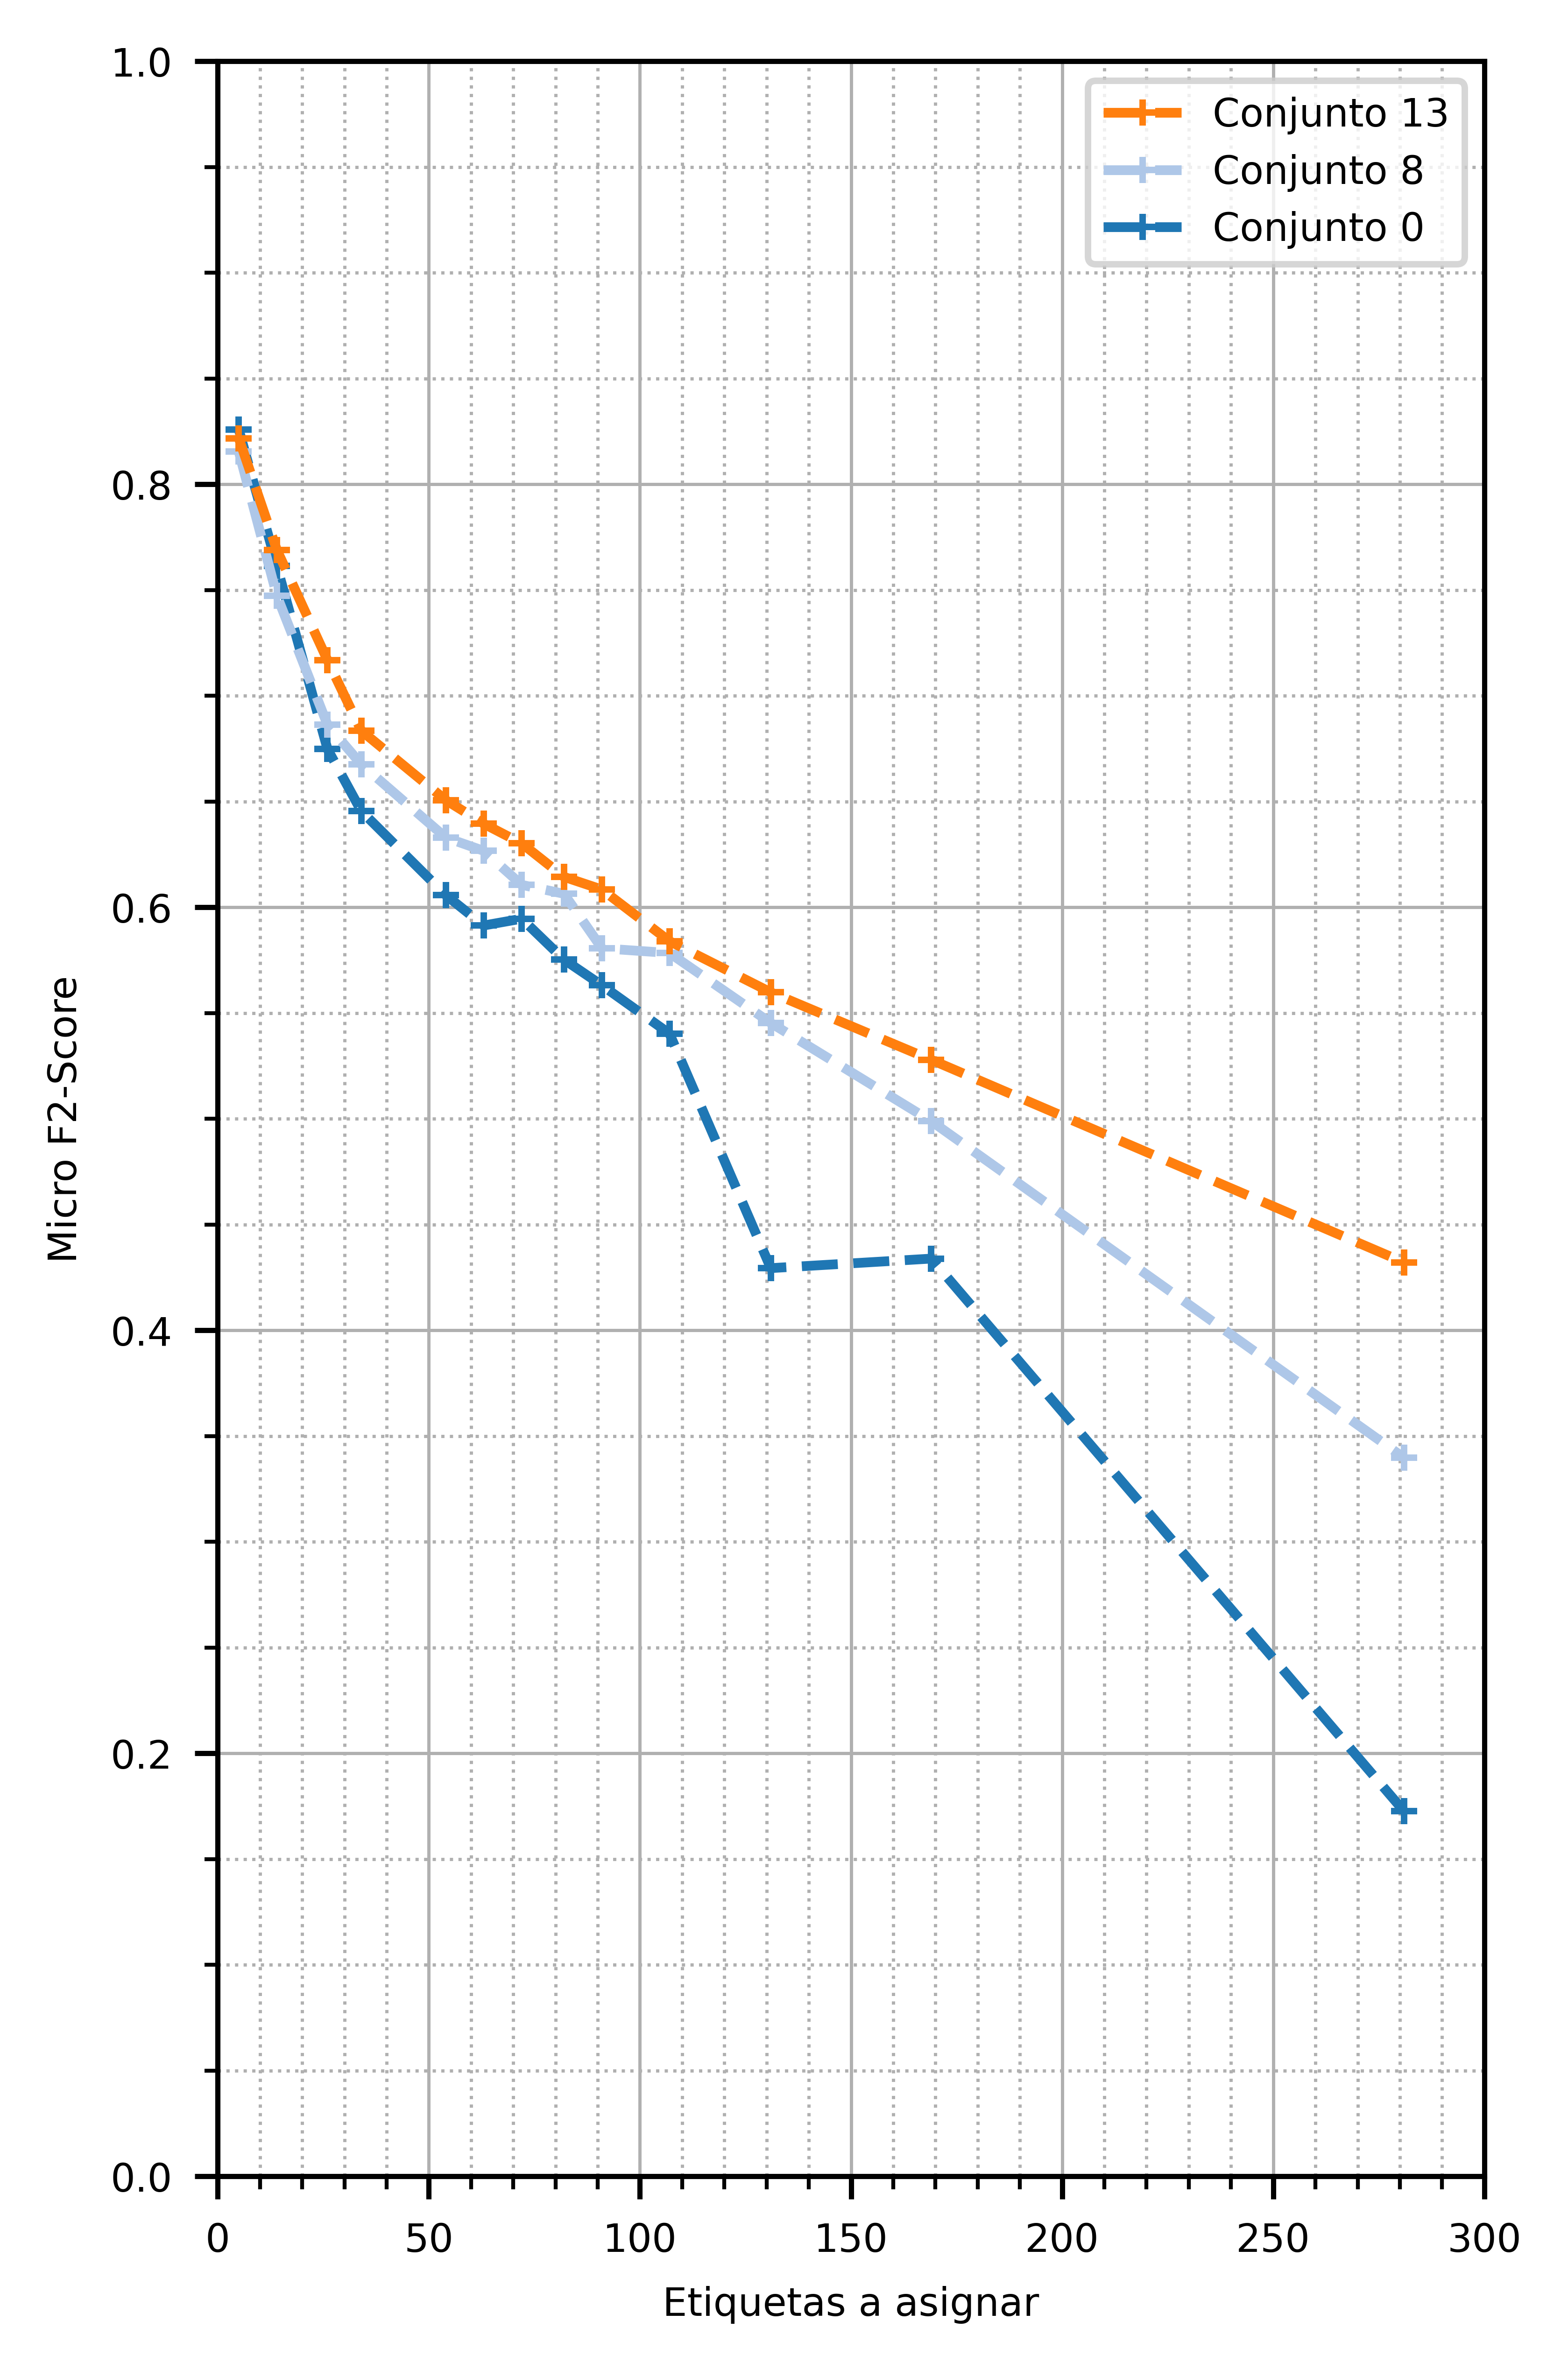

In [8]:
labels = ['Conjunto 0', 'Conjunto 8', 'Conjunto 13']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             #title = target_name + ' v/s Cantidad de Etiquetas',
             xlabel = "Etiquetas a asignar", ylabel = target_name,
             ylim = 1.0,
             xlim = 300,
            width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True,
             order = [2, 1, 0])

In [10]:
output_dir = os.path.join('..', 'outputs', 'alexnet_50th')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimento = 'blur_rain_ref_rot_elastic1'
apellido = '_weighted_1'
targets = ['f2', 'recall', 'precision']

# Armar diccionario de experimentos
for target in targets:
    scores[target] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for target in targets:
        path_metadata = os.path.join(output_dir, experimento, f'{n}L{apellido}', 'metadata.csv')
        metadata = pd.read_csv(path_metadata, index_col = 0)
        score_n = float(metadata.loc[[target]].values[0][0])
        #print(path_predicciones, score[0][0])
        scores[target].append(score_n)

In [11]:
scores

{'f2': [0.8217,
  0.769,
  0.7168,
  0.6835,
  0.6507,
  0.6395,
  0.6302,
  0.6144,
  0.6084,
  0.584,
  0.5598,
  0.5279,
  0.4321],
 'recall': [0.8314,
  0.798,
  0.7674,
  0.7485,
  0.739,
  0.7366,
  0.7344,
  0.7369,
  0.7248,
  0.7517,
  0.719,
  0.7234,
  0.7417],
 'precision': [0.7862,
  0.672,
  0.5677,
  0.5077,
  0.4409,
  0.4189,
  0.4024,
  0.3696,
  0.3708,
  0.3094,
  0.2971,
  0.2547,
  0.162]}

In [12]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 1000
plotter = KunischPlotter()

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:264: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


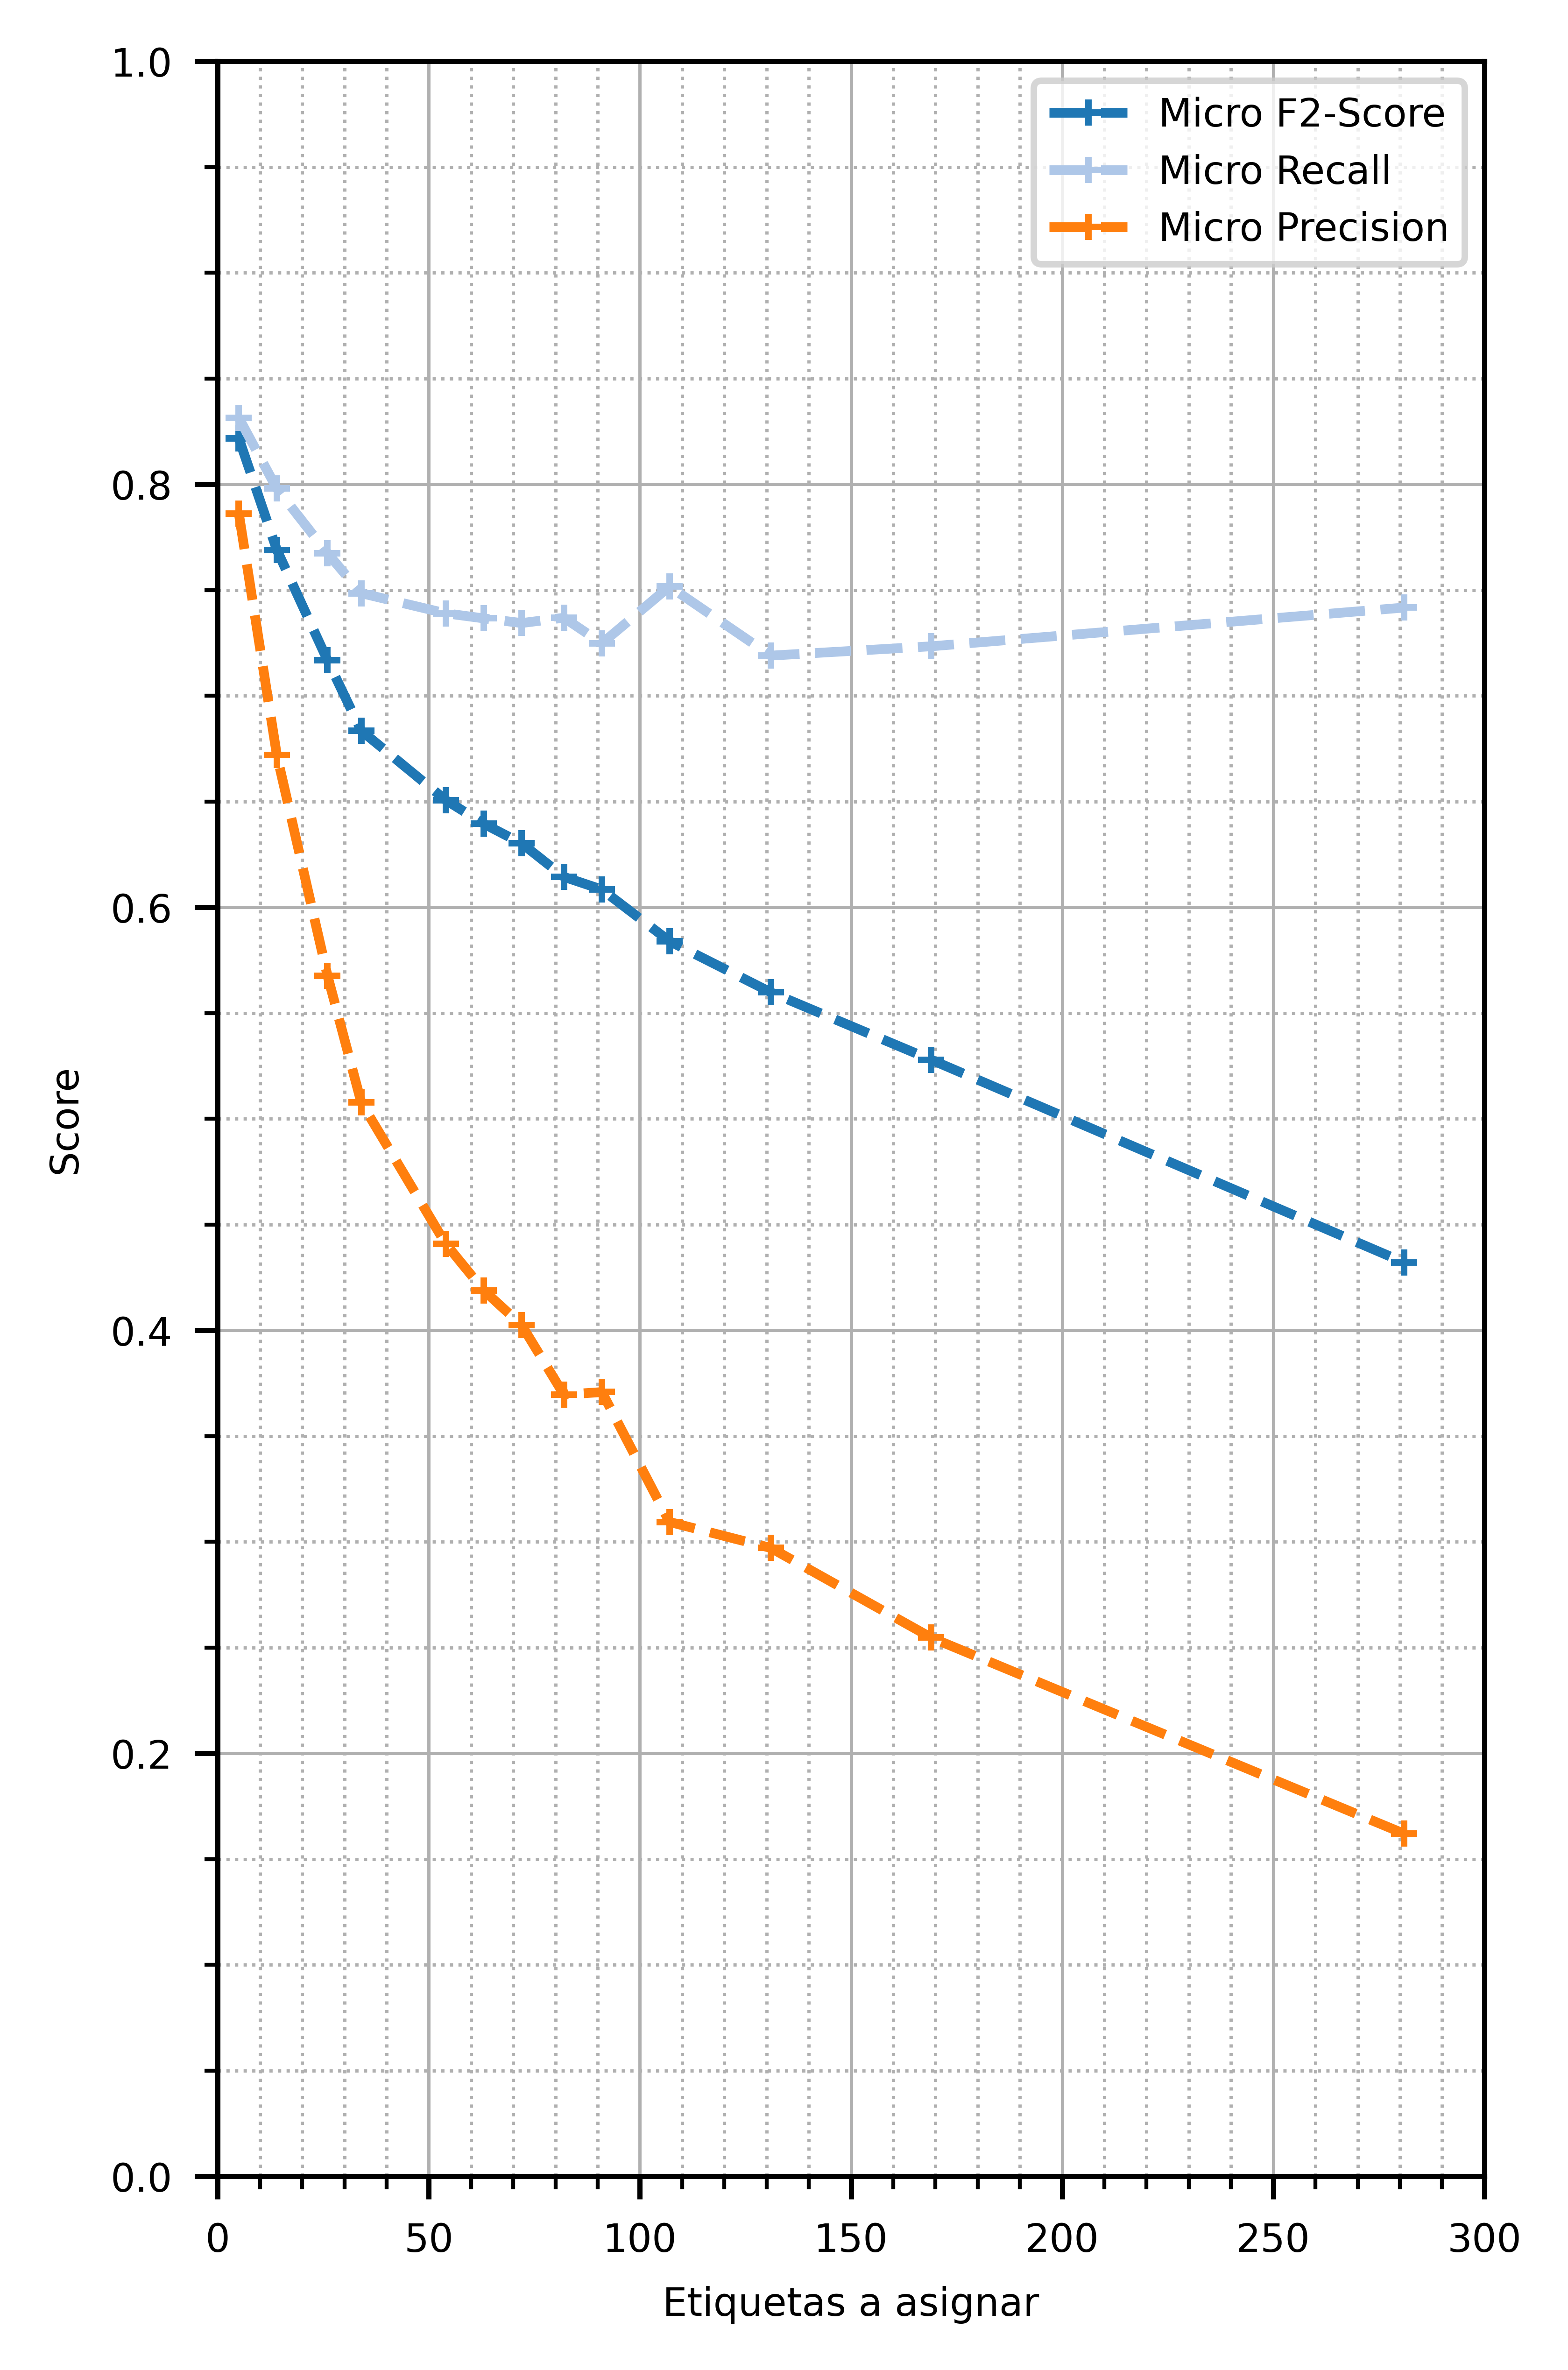

In [13]:
labels = ['Micro F2-Score', 'Micro Recall', 'Micro Precision', 'Hamming Score']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             #title = target_name + ' v/s Cantidad de Etiquetas',
             xlabel = "Etiquetas a asignar", ylabel = "Score",
             ylim = 1.0,
             xlim = 300,
             width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True,
             )

In [30]:
output_dir = os.path.join('..', 'outputs', 'alexnet_c13_evo')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimentos = ['base', 'blur', 'blur_rain_ref_rot_elastic1']
apellido = '_weighted_1'
targets = ['f2', 'recall', 'precision', 'hs', 'emr', 'mr5']

# Armar diccionario de experimentos
for n in nlabels:
    for exp in experimentos:
        scores[exp + ';' + str(n)] = {}

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for experimento in experimentos:
        for target in targets:
            path_metadata = os.path.join(output_dir, experimento, f'{n}L{apellido}', 'metadata.csv')
            metadata = pd.read_csv(path_metadata, index_col = 0)
            score = float(metadata.loc[[target]].values[0][0])
            scores[experimento + ';' + str(n)][target] = score

da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop1': 3,
    'elastic1': 4,
    'rain': 5,
    'randaug1': 6,
    'gausblur1': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref_rot': 10,
    'rain_ref_rot': 11,
    'rain_ref_rot_elastic1': 12,
    'blur_rain_ref_rot_elastic1': 13,
    'blur_rain_ref_rot_crop1_elastic1': 14,
    'blur_rain_ref_rot_crop1_randaug1_elastic1': 15,
}

In [31]:
scores

{'base;5': {'f2': 0.8258,
  'recall': 0.8546,
  'precision': 0.7308,
  'hs': 0.6711,
  'emr': 0.5206,
  'mr5': 0.8157},
 'blur;5': {'f2': 0.8154,
  'recall': 0.8354,
  'precision': 0.7566,
  'hs': 0.6936,
  'emr': 0.5489,
  'mr5': 0.8054},
 'blur_rain_ref_rot_elastic1;5': {'f2': 0.8217,
  'recall': 0.8314,
  'precision': 0.7862,
  'hs': 0.7048,
  'emr': 0.5954,
  'mr5': 0.7861},
 'base;14': {'f2': 0.7614,
  'recall': 0.8063,
  'precision': 0.6231,
  'hs': 0.5724,
  'emr': 0.2062,
  'mr5': 0.625},
 'blur;14': {'f2': 0.7474,
  'recall': 0.7849,
  'precision': 0.6333,
  'hs': 0.5694,
  'emr': 0.2217,
  'mr5': 0.5941},
 'blur_rain_ref_rot_elastic1;14': {'f2': 0.769,
  'recall': 0.798,
  'precision': 0.672,
  'hs': 0.6128,
  'emr': 0.2784,
  'mr5': 0.6108},
 'base;26': {'f2': 0.6748,
  'recall': 0.7658,
  'precision': 0.4617,
  'hs': 0.4246,
  'emr': 0.0374,
  'mr5': 0.5193},
 'blur;26': {'f2': 0.6863,
  'recall': 0.737,
  'precision': 0.5389,
  'hs': 0.4735,
  'emr': 0.0824,
  'mr5': 0.485

In [32]:
df = pd.DataFrame.from_dict(scores, orient='index')

In [35]:
df['etiquetas'] =[x.split(';')[1] for x in list(df.index.values)]
df['conjunto'] = [da_map[x.split(';')[0]] for x in list(df.index.values)]
df = df[['conjunto', 'etiquetas','f2', 'recall', 'precision', 'hs', 'emr', 'mr5']]
df

,conjunto,etiquetas,f2,recall,precision,hs,emr,mr5
base;5,0,5,0.8258,0.8546,0.7308,0.6711,0.5206,0.8157
blur;5,8,5,0.8154,0.8354,0.7566,0.6936,0.5489,0.8054
blur_rain_ref_rot_elastic1;5,13,5,0.8217,0.8314,0.7862,0.7048,0.5954,0.7861
base;14,0,14,0.7614,0.8063,0.6231,0.5724,0.2062,0.6250
blur;14,8,14,0.7474,0.7849,0.6333,0.5694,0.2217,0.5941
blur_rain_ref_rot_elastic1;14,13,14,0.7690,0.7980,0.6720,0.6128,0.2784,0.6108
base;26,0,26,0.6748,0.7658,0.4617,0.4246,0.0374,0.5193
blur;26,8,26,0.6863,0.7370,0.5389,0.4735,0.0824,0.4858
blur_rain_ref_rot_elastic1;26,13,26,0.7168,0.7674,0.5677,0.5103,0.1005,0.5232
base;34,0,34,0.6455,0.7692,0.3938,0.3765,0.0310,0.5180


In [36]:
df.to_csv("Experimento6.csv")